# Linear Regression_Delivery time


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [16]:
df.rename(columns={"Delivery Time": "Deliverytime"}, inplace = True)

In [18]:
df.rename(columns={"Sorting Time": "Sortingtime"}, inplace= True)

In [19]:
df

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x266924a0c70>,
 'caps': [<matplotlib.lines.Line2D at 0x26693598c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x266924abfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2669234f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26691c699a0>],
 'means': []}

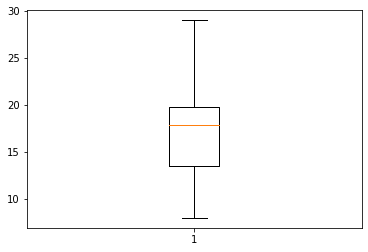

In [20]:
plt.boxplot(df['Deliverytime'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

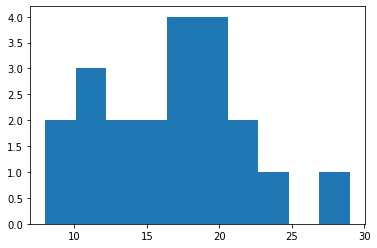

In [21]:
plt.hist(df['Deliverytime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26693568bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26690e2bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x266935a7ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x266914a16d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x266914a1970>],
 'means': []}

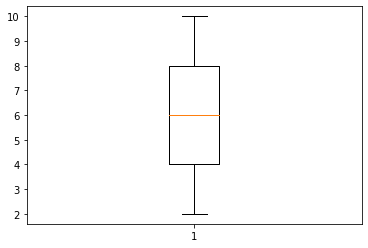

In [22]:
plt.boxplot(df['Sortingtime'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

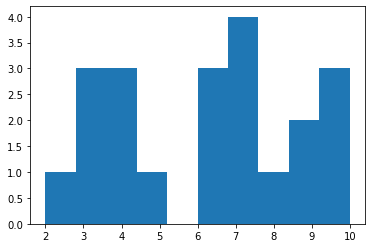

In [23]:
plt.hist(df['Sortingtime'])

([<matplotlib.lines.Line2D at 0x26690f35d00>],
 Text(0.5, 0, 'Delivery Time'),
 Text(0, 0.5, 'Sorting Time'))

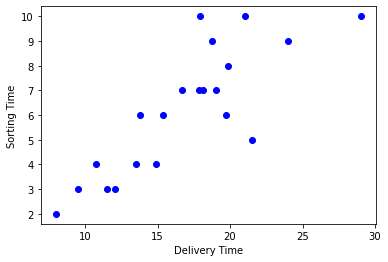

In [24]:
plt.plot(df['Deliverytime'], df['Sortingtime'], "bo"), plt.xlabel("Delivery Time"), plt.ylabel("Sorting Time")

In [38]:
df.corr()

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


In [13]:
import statsmodels.formula.api as smf

In [27]:
## Model Building
model = smf.ols("Deliverytime ~ Sortingtime", data = df).fit()

In [29]:
model.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           3.98e-06
Time:                        15:15:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
## Second model with log transformation
model2 = smf.ols('Deliverytime ~ np.log(Sortingtime)', data = df).fit()

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           2.64e-06
Time:                        15:35:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
## Third model with Square root transformation
model3 = smf.ols('Deliverytime~np.sqrt(Sortingtime)', data = df).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           2.61e-06
Time:                        15:36:58   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sortingtime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Model3 is the better model as the Rsqaured value is 0.696 comparing to other 2 models.